In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, classification_report
import cv2
import seaborn as sns


train_data_path = 'C:/Users/hp/Downloads/Face Mask Detection System/Face Mask Detection System/Dataset'
generate_data = 'C:/Users/hp/Downloads/Face Mask Detection System/Face Mask Detection System/Dataset'
data = 'C:/Users/hp/Downloads/Face Mask Detection System/Face Mask Detection System/Dataset'


train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split = 0.02
                                                            )

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,
                                                           validation_split = 0.2
                                                           )




train_data = train_gen.flow_from_directory(train_data_path ,
                                           target_size = (150,150),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(train_data_path  ,
                                         target_size = (150,150),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 8805 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, classification_report
import cv2
import seaborn as sns

In [4]:
labels = list(train_data.class_indices.keys())

labels

['1with_mask', '2without_mask', '3mask_weared_incorrect']

In [5]:
from tensorflow import keras

model_deploy = keras.models.load_model('Datasetfinal.h5')

In [11]:
model_evaluation = model_deploy.evaluate(train_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

276/276 [==============================] - 249s 900ms/step - loss: 0.0360 - accuracy: 0.9894
Model Accuracy:  98.94 %


In [17]:
import cv2
import os

img_name = "opencv_frame.png"
img_dir = "C:/Users/hp/Downloads/Face Mask Detection System/Face Mask Detection System/capture image" # directory to save images
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

cam = cv2.VideoCapture(0)

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        img_path = os.path.join(img_dir, img_name)
        if os.path.exists(img_path):
            if cv2.waitKey(0) == ord('y'):
                os.remove(img_path)
            else:
                continue
        cv2.imwrite(img_path, frame)
        print("{} written!".format(img_path))

cam.release()
cv2.destroyAllWindows()




C:/Users/hp/Downloads/Face Mask Detection System/Face Mask Detection System/capture image\opencv_frame.png written!
Escape hit, closing...


In [18]:
import cv2

# Load the cascade classifier for detecting faces
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load the image
img_path = "C:/Users/hp/Downloads/Face Mask Detection System/Face Mask Detection System/capture image/opencv_frame.png"
img = cv2.imread(img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Crop the image to the detected face region
if len(faces) > 0:
    (x, y, w, h) = faces[0]
    cropped = img[y:y+h, x:x+w]
    # Overwrite the original image with the cropped image
    cv2.imwrite(img_path, cropped)
    print("{} overwritten with cropped image!".format(img_path))
else:
    print("No face detected.")

C:/Users/hp/Downloads/Face Mask Detection System/Face Mask Detection System/capture image/opencv_frame.png overwritten with cropped image!


1/1 [==============================] - 0s 48ms/step
With Mask: 0.3262265
Without Mask: 0.062544644
Incorrect Wear: 0.6112288
0.3262265
0.062544644
0.6112288
1/1 [==============================] - 0s 119ms/step
[[0. 1. 0.]]


(-0.5, 149.5, 149.5, -0.5)

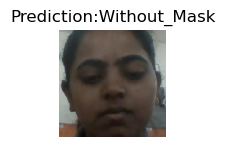

In [37]:
from keras.utils import img_to_array
from keras.utils.image_utils import load_img
import matplotlib.pyplot as plt
import tensorflow as tf


data = "C:/Users/hp/Downloads/Face Mask Detection System/Face Mask Detection System/capture image/opencv_frame.png"
# data ='D:/main project/Face Mask Detection System/testdataset/download.jpg'
#data = "C:/Users/hp/Downloads/Face Mask Detection System/Face Mask Detection System/testdataset/2.jpg"


# Define the classes
classes = ['With Mask', 'Without Mask','Incorrect Wear']

image = cv2.imread(data)
image = cv2.resize(image,(150, 150))
image = np.expand_dims(image, axis=0)

# Preprocess the image
image = image.astype('float32') / 255.0

# Use the model to make predictions on the image
predictions = model_deploy.predict(image)


# Print the probability of each class
for i in range(len(classes)):
    print(classes[i] + ': ' + str(predictions[0][i]))

with_mask=predictions[0][0]
without_mask=predictions[0][1]
incorrect_wear=predictions[0][2] 


print(with_mask)
print(without_mask)
print(incorrect_wear)


if 0.9<with_mask:
    # print("person wear mask")
    ans="With_Mask"
elif incorrectwear_mask<0.1:
    # print("person not wear mask")
    ans="incorrectwear_Mask"
else :
    # print("mask not wear correct");
    ans="Without_Mask"

labels = []
plt.figure(figsize=(8,8))
print(test_data)
# for i in range(len(test_data)):
image = load_img(data,target_size=(150,150))
# plt.imshow(image)
image_arr = img_to_array(image)
image_arr = np.array([image_arr])
#print(image.shape)
model_pred = model_deploy.predict(image_arr)
print(model_pred)
i = model_pred.argmax()
plt.subplot(5,5,i+1)
plt.imshow(image)
plt.title(f"Prediction:{ans}")
plt.subplots_adjust(top= 1.25)
plt.axis("off")